## Speed Dating Analysis

This data from this analysis is taken from a [kaggle dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment), which originates from a paper by Fisman and Iyengar at Columbia university exploring gender preferences in dating. Below are the results of some of my experiments and analysis of the data. 

### Function setup

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dates = pd.read_csv('speed.csv', encoding='latin1')

In [3]:
# split up into men and women
men = dates.loc[dates['gender'] == 1]
women = dates.loc[dates['gender'] == 0]

In [4]:
from math import pi
import matplotlib.patches as mpatches



def radar(categories, data1, data2, label1, label2, scale, title):
    N = len(cat)

    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Because our chart will be circular we need to append a copy of the first 
    # value of each list at the end of each list with data
    data1 += data1[:1]
    data2 += data2[:1]

    x_as += x_as[:1]


    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")


    # Create polar plot
    ax = plt.subplot(111, polar=True)


    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)


    # Set position of y-labels
    ax.set_rlabel_position(0)


    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
    ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)


    # Set number of radial axes and remove labels
    plt.xticks(x_as[:-1], [])

    # Set yticks
    plt.yticks([0, int(scale/2)], ["0", str(int(scale/2))])

    # Plot data
    ax.plot(x_as, data1, linewidth=0, linestyle='solid', zorder=3)
    ax.fill(x_as, data1, 'b', alpha=0.5)

    # Plot data
    ax.plot(x_as, data2, linewidth=0, linestyle='solid', zorder=3)
    ax.fill(x_as, data2, 'g', alpha=0.5)


    # Set axes limits
    plt.ylim(0, scale)

    # Draw ytick labels to make sure they fit properly
    for i in range(N):
        angle_rad = i / float(N) * 2 * pi

        if angle_rad == 0:
            ha, distance_ax = "center", 10
        elif 0 < angle_rad < pi:
            ha, distance_ax = "left", 1
        elif angle_rad == pi:
            ha, distance_ax = "center", 1
        else:
            ha, distance_ax = "right", 1

        ax.text(angle_rad, .7 * scale +  distance_ax, cat[i], size=10, horizontalalignment=ha, verticalalignment="center")
    
    
    b_patch = mpatches.Patch(color='blue', label=label1)
    g_patch = mpatches.Patch(color='green', label=label2)
    plt.legend(handles=[b_patch,g_patch])
    
    plt.title(title, loc="left")
    plt.savefig("".join(title.split()))

    # Show polar plot
    plt.show()


# Pre-date:

In this part, I will examine what both genders reported before going on any speed dates. I mostly examine what participants labeled as important traits before going on any dates.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


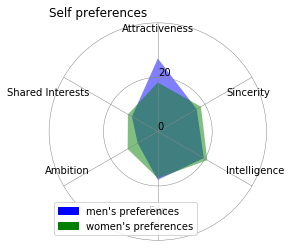

In [5]:
men.drop(men[men.wave >= 6][men.wave <= 9].index)
women.drop(women[women.wave >= 6][women.wave <= 9].index)

# plot what men and women say they think are important, pre-dates
mpref = [men['attr1_1'].mean(skipna=True), men['sinc1_1'].mean(skipna=True), men['intel1_1'].mean(skipna=True), men['fun1_1'].mean(skipna=True), men['amb1_1'].mean(skipna=True), men['shar1_1'].mean(skipna=True)]
wpref = [women['attr1_1'].mean(skipna=True), women['sinc1_1'].mean(skipna=True), women['intel1_1'].mean(skipna=True), women['fun1_1'].mean(skipna=True), women['amb1_1'].mean(skipna=True), women['shar1_1'].mean(skipna=True)]
cat = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition','Shared Interests']

radar(cat,mpref,wpref, "men's preferences", "women's preferences", 40, "Self preferences")


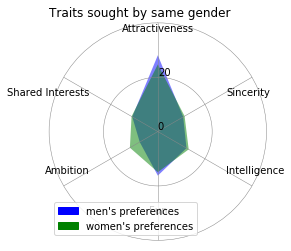

In [6]:
# plot what men think other men desire, and what women think other women desire
mpref = [men['attr4_1'].mean(skipna=True), men['sinc4_1'].mean(skipna=True), men['intel4_1'].mean(skipna=True), men['fun4_1'].mean(skipna=True), men['amb4_1'].mean(skipna=True), men['shar4_1'].mean(skipna=True)]
wpref = [women['attr4_1'].mean(skipna=True), women['sinc4_1'].mean(skipna=True), women['intel4_1'].mean(skipna=True), women['fun4_1'].mean(skipna=True), women['amb4_1'].mean(skipna=True), women['shar4_1'].mean(skipna=True)]

radar(cat,mpref,wpref, "men's preferences", "women's preferences", 40, "Traits sought by same gender")


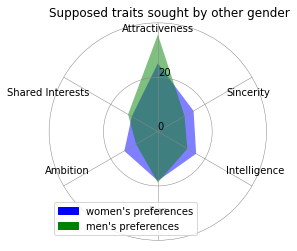

In [7]:
# plot what each thinks the other gender desires

mpref = [men['attr2_1'].mean(skipna=True), men['sinc2_1'].mean(skipna=True), men['intel2_1'].mean(skipna=True), men['fun2_1'].mean(skipna=True), men['amb2_1'].mean(skipna=True), men['shar2_1'].mean(skipna=True)]
wpref = [women['attr2_1'].mean(skipna=True), women['sinc2_1'].mean(skipna=True), women['intel2_1'].mean(skipna=True), women['fun2_1'].mean(skipna=True), women['amb2_1'].mean(skipna=True), women['shar2_1'].mean(skipna=True)]

radar(cat,mpref,wpref,"women's preferences" ,"men's preferences" , 40, "Supposed traits sought by other gender")

# During the date: second shot or not?

## Shared Preferences
In this subsection, I examine whether shared interests and self-reported preferred qualities are highly correlated with the other party wanting a 2nd date. To do this, I visualize the data and fit logistic regressions onto features that may play a role, examining the significance and explanatory power of each regression.

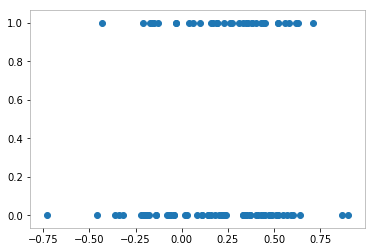

In [8]:
men = dates.loc[dates['gender'] == 1]
women = dates.loc[dates['gender'] == 0]

men = men[np.isfinite(men['int_corr'])]
women = women[np.isfinite(women['int_corr'])]


smallVisualize = men.sample(n=100, random_state=0)
fig = plt.scatter(smallVisualize.int_corr,smallVisualize.dec_o)

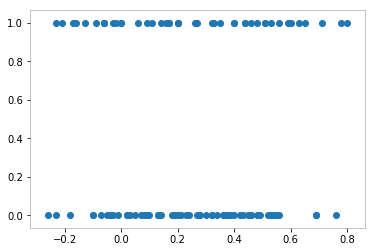

In [9]:
smallVisualize = women.sample(n=100, random_state=0)
fig = plt.scatter(smallVisualize.int_corr,smallVisualize.dec_o)

In [10]:
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix


X = men.int_corr.reshape(-1,1)
y = men.dec_o

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.64


/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [11]:
X = women.int_corr.reshape(-1,1)
y = women.dec_o

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.53


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [12]:
women = dates.loc[dates['gender'] == 0]

women = women[np.isfinite(women['attr_o'])]
women = women[np.isfinite(women['sinc_o'])]
women = women[np.isfinite(women['intel_o'])]
women = women[np.isfinite(women['fun_o'])]
women = women[np.isfinite(women['amb_o'])]
women = women[np.isfinite(women['shar_o'])]

X = women[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o']]
y = women.dec_o

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

print(LogReg.coef_)

Accuracy of logistic regression classifier on test set: 0.73
[[ 0.67602021 -0.18864944 -0.04923867  0.27788593 -0.14407121  0.26136839]]


In [13]:
men = men[np.isfinite(men['attr_o'])]
men = men[np.isfinite(men['sinc_o'])]
men = men[np.isfinite(men['intel_o'])]
men = men[np.isfinite(men['fun_o'])]
men = men[np.isfinite(men['amb_o'])]
men = men[np.isfinite(men['shar_o'])]

X = men[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o']]
y = men.dec_o

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


LogReg = LogisticRegression(random_state=0)
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

print("Coefficients in the order of attractiveness, sincerity, intelligence, fun, ambition, and shared interests")
print(LogReg.coef_)

Accuracy of logistic regression classifier on test set: 0.74
Coefficients in the order of attractiveness, sincerity, intelligence, fun, ambition, and shared interests
[[ 0.37452762 -0.08004197  0.07629725  0.2888793  -0.15878627  0.25447388]]


## Know thyself

I examine whether candidates own reported preferences from before the date were able to predict how much they actually ranked the other party's likeability. I do this by regressing a weighted sum of the particular candidate's deviation from the mean for each feature in attractiveness, intelligence, sincereness, etc. on the likeability score that their partner assigns them.

In [14]:
men = dates.loc[dates['gender'] == 1]
women = dates.loc[dates['gender'] == 0]

# drop rows with NaN or missing values for like_o or dec_o
men = men[np.isfinite(men['like_o'])]
men = men[np.isfinite(men['dec_o'])]
women = women[np.isfinite(women['dec_o'])]
women = women[np.isfinite(women['like_o'])]

# logistic regression to find relationship between how much they liked
# and second date 
X = men.like_o.values.reshape(-1,1)
y = men.dec_o

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [15]:
# split up into men and women
men = dates.loc[dates['gender'] == 1]

# drop NaN for columns we're interested in
men = men[np.isfinite(men['attr_o'])]
men = men[np.isfinite(men['sinc_o'])]
men = men[np.isfinite(men['intel_o'])]
men = men[np.isfinite(men['fun_o'])]
men = men[np.isfinite(men['amb_o'])]
men = men[np.isfinite(men['shar_o'])]
men = men[np.isfinite(men['dec_o'])]
men = men[np.isfinite(men['like_o'])]
men = men[np.isfinite(men['attr1_1'])]
men = men[np.isfinite(men['sinc1_1'])]
men = men[np.isfinite(men['intel1_1'])]
men = men[np.isfinite(men['fun1_1'])]
men = men[np.isfinite(men['amb1_1'])]
men = men[np.isfinite(men['shar1_1'])]


attrMed = men['attr_o'].median()
sincMed = men['sinc_o'].median()
intelMed = men['intel_o'].median()
funMed = men['fun_o'].median()
ambMed = men['amb_o'].median()
sharMed = men['shar_o'].median()


men['score'] = ((men['attr_o'] - attrMed) * men['attr1_1'] + (men['sinc_o'] - sincMed) * men['sinc1_1'] + \
(men['intel_o'] - intelMed) + men['intel1_1'] + (men['fun_o'] - funMed) * men['fun1_1'] + \
(men['amb_o'] - ambMed) * men['amb1_1'] + (men['shar_o']-sharMed) * men['shar1_1'])/100


# logistic regression to find relationship between how much they liked
# and second date 
X = men.score.values.reshape(-1,1)
y = men.dec_o

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


Coefficients: 
 [ 1.17684589]
Mean squared error: 1.49


/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


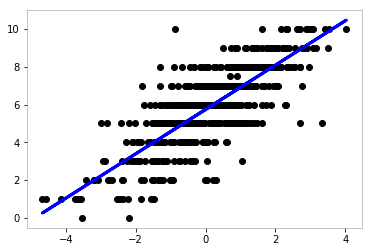

In [16]:
# linear regression to find relationship between how much they liked
# and like score
X = men.score.values.reshape(-1,1)
y = men.like_o

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

print('Coefficients: \n', linear.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.savefig("scoremen")

In [17]:
women = dates.loc[dates['gender'] == 0]

women = women[np.isfinite(women['dec_o'])]
women = women[np.isfinite(women['like_o'])]

# logistic regression to find relationship between how much they liked
# and second date 
X = women.like_o.values.reshape(-1,1)
y = women.dec_o

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73897


In [18]:
# split up wowomen
women = dates.loc[dates['gender'] == 1]

# drop NaN for columns we're interested in
women = women[np.isfinite(women['attr_o'])]
women = women[np.isfinite(women['sinc_o'])]
women = women[np.isfinite(women['intel_o'])]
women = women[np.isfinite(women['fun_o'])]
women = women[np.isfinite(women['amb_o'])]
women = women[np.isfinite(women['shar_o'])]
women = women[np.isfinite(women['dec_o'])]
women = women[np.isfinite(women['like_o'])]
women = women[np.isfinite(women['attr1_1'])]
women = women[np.isfinite(women['sinc1_1'])]
women = women[np.isfinite(women['intel1_1'])]
women = women[np.isfinite(women['fun1_1'])]
women = women[np.isfinite(women['amb1_1'])]
women = women[np.isfinite(women['shar1_1'])]


attrMed = women['attr_o'].median()
sincMed = women['sinc_o'].median()
intelMed = women['intel_o'].median()
funMed = women['fun_o'].median()
ambMed = women['amb_o'].median()
sharMed = women['shar_o'].median()


women['score'] = ((women['attr_o'] - attrMed) * women['attr1_1'] + (women['sinc_o'] - sincMed) * women['sinc1_1'] + \
(women['intel_o'] - intelMed) + women['intel1_1'] + (women['fun_o'] - funMed) * women['fun1_1'] + \
(women['amb_o'] - ambMed) * women['amb1_1'] + (women['shar_o']-sharMed) * women['shar1_1'])/100


# logistic regression to find relationship between how much they liked
# and second date 
X = women.score.values.reshape(-1,1)
y = women.dec_o

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(LogReg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73607


Coefficients: 
 [ 1.17684589]
Mean squared error: 1.49


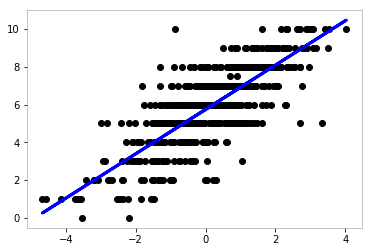

In [19]:
# linear regression to find relationship between how much they liked
# and like score
X = women.score.values.reshape(-1,1)
y = women.like_o

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)


linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

print('Coefficients: \n', linear.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.savefig("scorewomen")

## Post-date effects

### Changes in preferences

To examine changes in preference/self-assesment for people getting more and less second date requests than median. I would expect that some candidates self-assesments in both genders would on par go down after unsuccesful dating, but self-image barely changed in both genders when comparing across people who received more requests for second dates and those who didn't

### Changes in women's preferences

In [20]:
women = dates.loc[dates['gender'] == 0]
men = dates.loc[dates['gender'] == 1]

yes_female = {}

for i in range(1,max(dates.iid)):
    success, total = 0, 0
    success = men[(men['pid']==i) & (men['dec_o']==1)].shape[0]
    total = men[(men['pid']==i)].shape[0]
    if total > 0:
        yes_female[i] = (i, success/total, total)

distrib = []
for k,v in yes_female.items():
    distrib.append(v[1])

mid = np.median(distrib)

print("Mean yes rate for women:" + str(np.mean(distrib)))
print("Median yes rate for women:" + str(np.median(distrib)))
print("Std dev for yes rate for women:" + str(np.std(distrib)))

Mean yes rate for women:0.373788832289
Median yes rate for women:0.368421052632
Std dev for yes rate for women:0.23934556876


In [21]:
above = []
below = []

for k,v in yes_female.items():
    if v[1] > mid:
        above.append(v[0])
    elif v[1] < mid:
        below.append(v[0])

abovew = women[women['iid'].isin(above)]
beloww = women[women['iid'].isin(below)]

### Self-perception

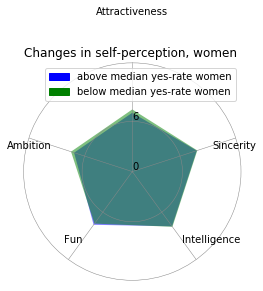

In [22]:
aw = [abovew['attr3_2'].mean(skipna=True), abovew['sinc3_2'].mean(skipna=True), abovew['intel3_2'].mean(skipna=True), abovew['fun3_2'].mean(skipna=True), abovew['amb3_2'].mean(skipna=True)]
bw = [beloww['attr3_2'].mean(skipna=True), beloww['sinc3_2'].mean(skipna=True), beloww['intel3_2'].mean(skipna=True), beloww['fun3_2'].mean(skipna=True), beloww['amb3_2'].mean(skipna=True)]
cat = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition']

radar(cat,aw,bw, "above median yes-rate women", "below median yes-rate women", 13, "Changes in self-perception, women")
      
      

### Preference - after

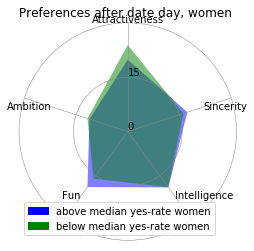

In [23]:
aw = [abovew['attr1_2'].mean(skipna=True), abovew['sinc1_2'].mean(skipna=True), abovew['intel1_2'].mean(skipna=True), abovew['fun1_2'].mean(skipna=True), abovew['amb1_2'].mean(skipna=True)]
bw = [beloww['attr1_2'].mean(skipna=True), beloww['sinc1_2'].mean(skipna=True), beloww['intel1_2'].mean(skipna=True), beloww['fun1_2'].mean(skipna=True), beloww['amb1_2'].mean(skipna=True)]
cat = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition']

radar(cat,aw,bw, "above median yes-rate women", "below median yes-rate women", 30, "Preferences after date day, women")

      

### Preference - before

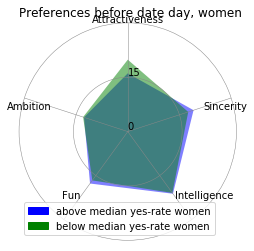

In [24]:
aw = [abovew['attr1_1'].mean(skipna=True), abovew['sinc1_1'].mean(skipna=True), abovew['intel1_1'].mean(skipna=True), abovew['fun1_1'].mean(skipna=True), abovew['amb1_1'].mean(skipna=True)]
bw = [beloww['attr1_1'].mean(skipna=True), beloww['sinc1_1'].mean(skipna=True), beloww['intel1_1'].mean(skipna=True), beloww['fun1_1'].mean(skipna=True), beloww['amb1_1'].mean(skipna=True)]
cat = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition']

radar(cat,aw,bw, "above median yes-rate women", "below median yes-rate women", 30, "Preferences before date day, women")

### Changes in men's preferences

In [25]:
women = dates.loc[dates['gender'] == 0]
men = dates.loc[dates['gender'] == 1]

yes_male = {}

for i in range(1,max(dates.iid)):
    success, total = 0, 0
    success = women[(women['pid']==i) & (women['dec_o']==1)].shape[0]
    total = women[(women['pid']==i)].shape[0]
    if total > 0:
        yes_male[i] = (i, success/total, total)

distrib = []
for k,v in yes_male.items():
    distrib.append(v[1])

mid = np.median(distrib)

print("Mean yes rate for men:" + str(np.mean(distrib)))
print("Median yes rate for men:" + str(np.median(distrib)))
print("Std dev for yes rate for men:" + str(np.std(distrib)))

Mean yes rate for men:0.482478546223
Median yes rate for men:0.444444444444
Std dev for yes rate for men:0.26036893687


In [26]:
above = []
below = []

for k,v in yes_male.items():
    if v[1] > mid:
        above.append(v[0])
    else:
        below.append(v[0])

abovem = men[men['iid'].isin(above)]
belowm = men[men['iid'].isin(below)]

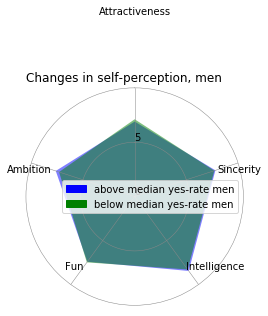

In [27]:
am = [abovem['attr3_2'].mean(skipna=True), abovem['sinc3_2'].mean(skipna=True), abovem['intel3_2'].mean(skipna=True), abovem['fun3_2'].mean(skipna=True), abovem['amb3_2'].mean(skipna=True)]
bm = [belowm['attr3_2'].mean(skipna=True), belowm['sinc3_2'].mean(skipna=True), belowm['intel3_2'].mean(skipna=True), belowm['fun3_2'].mean(skipna=True), belowm['amb3_2'].mean(skipna=True)]
cat = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition']

radar(cat,am,bm, "above median yes-rate men", "below median yes-rate men", 10, "Changes in self-perception, men")



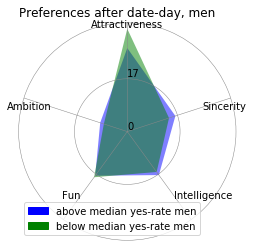

In [28]:
am = [abovem['attr1_2'].mean(skipna=True), abovem['sinc1_2'].mean(skipna=True), abovem['intel1_2'].mean(skipna=True), abovem['fun1_2'].mean(skipna=True), abovem['amb1_2'].mean(skipna=True)]
bm = [belowm['attr1_2'].mean(skipna=True), belowm['sinc1_2'].mean(skipna=True), belowm['intel1_2'].mean(skipna=True), belowm['fun1_2'].mean(skipna=True), belowm['amb1_2'].mean(skipna=True)]
cat = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition']

radar(cat,am,bm, "above median yes-rate men", "below median yes-rate men", 35, "Preferences after date-day, men")

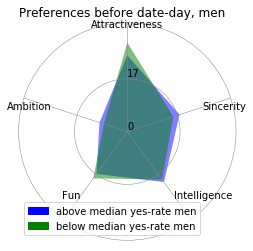

In [29]:
am = [abovem['attr1_1'].mean(skipna=True), abovem['sinc1_1'].mean(skipna=True), abovem['intel1_1'].mean(skipna=True), abovem['fun1_1'].mean(skipna=True), abovem['amb1_1'].mean(skipna=True)]
bm = [belowm['attr1_1'].mean(skipna=True), belowm['sinc1_1'].mean(skipna=True), belowm['intel1_1'].mean(skipna=True), belowm['fun1_1'].mean(skipna=True), belowm['amb1_1'].mean(skipna=True)]
cat = ['Attractiveness', 'Sincerity', 'Intelligence', 'Fun', 'Ambition']

radar(cat,am,bm, "above median yes-rate men", "below median yes-rate men", 35, "Preferences before date-day, men")